In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# print all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

np.set_printoptions(precision=4)

# 1. PCA - Principal Component Analysis

- For PCA, we will use the built in breast cancer dataset in the `sklearn` library.

In [2]:
# load dataset as a skutil bunch
from sklearn.datasets import load_breast_cancer
db = load_breast_cancer()

In [3]:
# extract independent features as np array
data = db.data
data.shape

(569, 30)

In [4]:
# extract target as np array
target = db.target
target.shape

(569,)

In [5]:
# reshape target as 2 dim np array
target = np.reshape(target,(569,1))
target.shape

(569, 1)

In [6]:
# create dataframe
df = pd.DataFrame(np.concatenate([data, target], axis = 1), columns=np.append(db.feature_names, 'target'))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
df.shape

(569, 31)

- There are a total of 30 features in this dataset which can be reduced to 2 using PCA. Let's see if we can still have a good separability in the dataset.
- Before applying PCA, it is essential that the data be standardized and normalized i.e. mean = 0 and std_dev = 1.

In [8]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df.iloc[:, :-1])
print("Mean =", format(np.absolute(np.mean(x)), '.2f'))
print("Std. Deviation =", np.std(x))

Mean = 0.00
Std. Deviation = 1.0


In [9]:
normalized_df = pd.DataFrame(x, columns=db.feature_names)
normalized_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [10]:
normalized_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,-9.740305e-16,-9.084707e-16,1.860648e-15,-7.679856e-16,-7.352057e-16,-3.996022e-16,8.553985e-16,-2.684828e-16,-3.371644e-16,-3.059455e-16,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447e+00,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-6.744900e-01,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-1.404958e-01,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,4.726567e-01,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601e+00,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


- We can now see that the data is centered around origin. Now, let's try to project the data from 30 dimensions to 2.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(normalized_df)
pca_data = pca.transform(normalized_df)

In [12]:
pca_df = pd.DataFrame(pca_data, columns = ['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

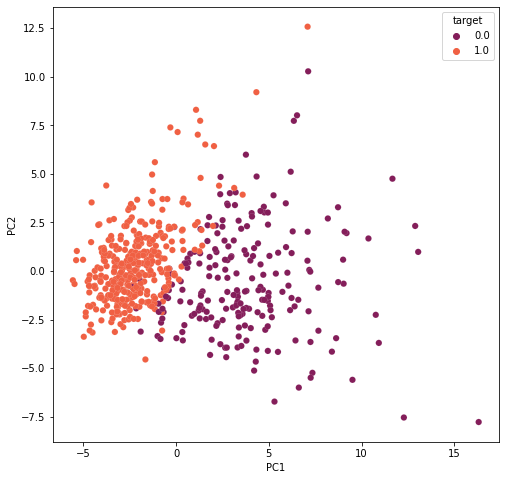

In [13]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = df.target, palette='rocket', s = 40, linewidth = 0.1)

- We can now see a clear separation between two classes. 
- These two components can even be used to train the prediction model.

In [14]:
pca.explained_variance_

array([13.305 ,  5.7014])

In [15]:
pca.explained_variance_ratio_

array([0.4427, 0.1897])

In [16]:
# Singulrar Values
pca.singular_values_

array([86.9324, 56.9068])

In [17]:
# Loadings (distribution of each component)
pca.components_

array([[ 0.2189,  0.1037,  0.2275,  0.221 ,  0.1426,  0.2393,  0.2584,
         0.2609,  0.1382,  0.0644,  0.206 ,  0.0174,  0.2113,  0.2029,
         0.0145,  0.1704,  0.1536,  0.1834,  0.0425,  0.1026,  0.228 ,
         0.1045,  0.2366,  0.2249,  0.128 ,  0.2101,  0.2288,  0.2509,
         0.1229,  0.1318],
       [-0.2339, -0.0597, -0.2152, -0.2311,  0.1861,  0.1519,  0.0602,
        -0.0348,  0.1903,  0.3666, -0.1056,  0.09  , -0.0895, -0.1523,
         0.2044,  0.2327,  0.1972,  0.1303,  0.1838,  0.2801, -0.2199,
        -0.0455, -0.1999, -0.2194,  0.1723,  0.1436,  0.098 , -0.0083,
         0.1419,  0.2753]])

- PCA gives us the amount of variance explained by each component. Let's see how the variation is captured when we reduce the dimensions to 6.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca = pca.fit(normalized_df)
pca_data_6 = pca.transform(normalized_df)

In [19]:
pca_df_6 = pd.DataFrame(pca_data_6, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5' ,'PC6'])
pca_df_6.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053421
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495


In [20]:
pca.explained_variance_ratio_

array([0.4427, 0.1897, 0.0939, 0.066 , 0.055 , 0.0402])

<AxesSubplot:>

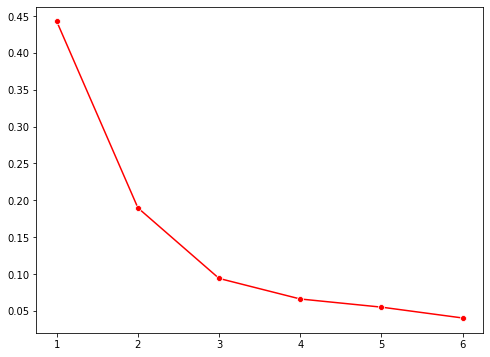

In [21]:
plt.figure(figsize = (8,6))
sns.lineplot(x = np.arange(pca.n_components_) + 1, y = pca.explained_variance_ratio_, marker = 'o', color = 'red')

- We can see that the majority of variation is explained by the first 2 Principal Components itself. 

# 2. Linear Discriminant Analysis (LDA)

- Note that LDA gives `Number of components <= min(n_classes - 1, n_features)` for dimensionality reduction

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

lda = LinearDiscriminantAnalysis()
lda = lda.fit(X=x, y = df.target)
lda_data = lda.transform(normalized_df)

In [23]:
lda.explained_variance_ratio_

array([1.])

In [24]:
lda_data.shape

(569, 1)

In [25]:
lda_data.reshape([569]).shape

(569,)

[(-0.1, 0.4)]

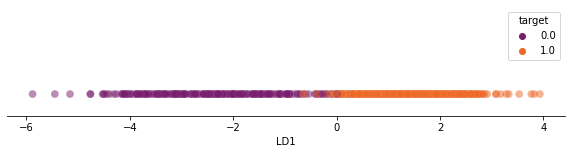

In [26]:
plt.figure(figsize=(10,2))
fig = sns.scatterplot(x = lda_data.reshape([569]), y = np.zeros_like(lda_data.reshape([569])), hue = df.target, 
                s = 60, palette = 'inferno', alpha = 0.5, linewidth = 0.1)
sns.despine(left = True)
fig.set(yticklabels=[], ylabel = None, xlabel = 'LD1')
fig.tick_params(left = False)
fig.set(ylim=(-0.1,0.4))

- As we can see above, even a single LDA component is enough to get a good separation in data.

# 3. Multi-Dimensional Scaling (MDS)

## a.k.a. PCoA (Principal Co-ordinate Analysis)


- To demonstrate MDS, we will make use of the "Swiss Role" dataset to see how PCoA better captures the non-linearity among features.

In [2]:
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=2000, noise = 0.05)

X.shape

(2000, 3)

- This is a 3D dataset so we will use `Plotly` to display the data in 3D

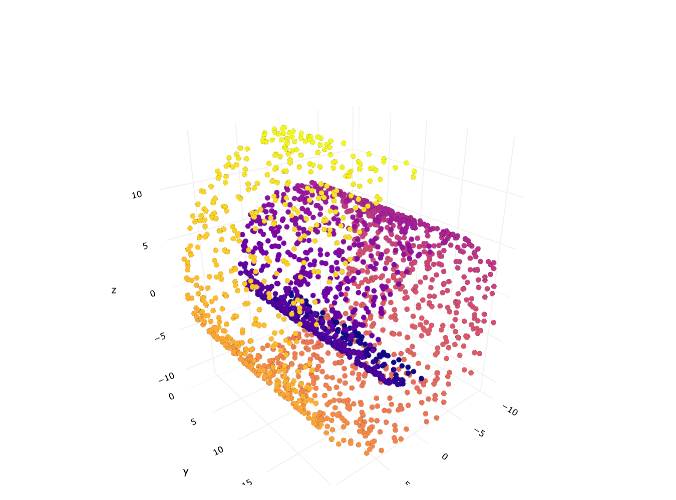

In [44]:
import plotly.express as px

## init 3d scatter plot
fig = px.scatter_3d(x = X[:, 0], y =X[:, 1], z = X[:, 2], color=y)

## plot and view settings
fig.update_layout(showlegend = False,
                  scene_camera = dict(up = dict(x = 0, y = 0, z = 0.5),
                                      center = dict(x = 0, y = 0, z = 0.1),
                                      eye = dict(x = 1.25, y = 1.5, z = 1)
                                      ),
                  scene = dict(xaxis = dict(backgroundcolor = 'white',
                                            color = 'black',
                                            gridcolor = '#f0f0f0',
                                            title_font = dict(size = 10),
                                            tickfont = dict(size = 10)
                                            ),
                               yaxis = dict(backgroundcolor = 'white',
                                            color = 'black',
                                            gridcolor = '#f0f0f0',
                                            title_font = dict(size = 10),
                                            tickfont = dict(size = 10)
                                            ),
                               zaxis = dict(backgroundcolor = 'white',
                                            color = 'black',
                                            gridcolor = '#f0f0f0',
                                            title_font = dict(size = 10),
                                            tickfont = dict(size = 10)
                                            )))

# markers
fig.update_traces(marker = dict(size = 3,
                                line = dict(color = 'black', width = 0.05)))

## hide color scale
fig.update(layout_coloraxis_showscale = False)

fig.update_layout(
    margin=dict(l=25, r=25, t=25, b=15),
    width=500,
    height=500
)

fig.show()

In [7]:
from sklearn.manifold import MDS

model = MDS(n_components=2,
            metric = True,         # perform Metric MDS
            n_init=4,
            max_iter = 300,
            verbose = 1,
            eps = 0.001,
            random_state = 42,
            dissimilarity = 'euclidean'
           )

X_mds = model.fit_transform(X)

breaking at iteration 256 with stress 22694605.44351391
breaking at iteration 183 with stress 22671384.191474862
breaking at iteration 128 with stress 22671382.36308467
breaking at iteration 169 with stress 22671386.266970154


In [15]:
print('The new shape of X:',X_mds.shape)
print('No. of Iterations:', model.n_iter_)
print('Stress:', model.stress_)

The new shape of X: (2000, 2)
No. of Iterations: 129
Stress: 22671382.36308467


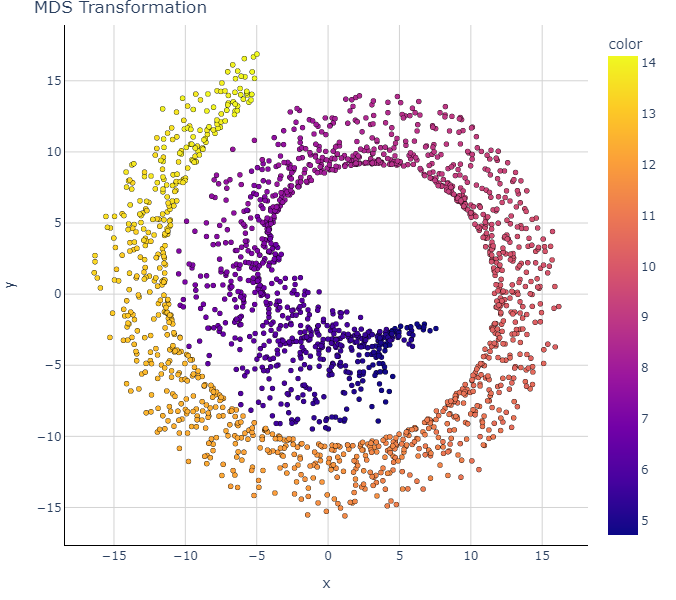

In [36]:
# scatter plot using plotly

## init scatter plot
fig = px.scatter(x = X_mds[:, 0], y = X_mds[:, 1], opacity = 1, color = y)

## bg color
fig.update_layout(dict(plot_bgcolor = 'white'))

## axes and grids
fig.update_xaxes(showgrid = True, gridwidth = 1, gridcolor = 'lightgrey',
                 zeroline = True, zerolinewidth = 1, zerolinecolor = 'lightgrey',
                 showline = True, linewidth = 1, linecolor = 'black'
                )

fig.update_yaxes(showgrid = True, gridwidth = 1, gridcolor = 'lightgrey',
                 zeroline = True, zerolinewidth = 1, zerolinecolor = 'lightgrey',
                 showline = True, linewidth = 1, linecolor = 'black'
                )

## markers
fig.update_traces(marker = dict(size = 5,
                                line = dict(color = 'black', width = 0.2)
                               ))

## size and title
fig.update_layout(
    margin=dict(l=25, r=25, t=25, b=25),
    width=700,
    height=600,
    # paper_bgcolor="LightSteelBlue",
    title_text="MDS Transformation"
)

# show fig
fig.show();

- As we can now see, the representation of data is maintained in even 2d. Let's compare this to PCA now.

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(2000, 2)

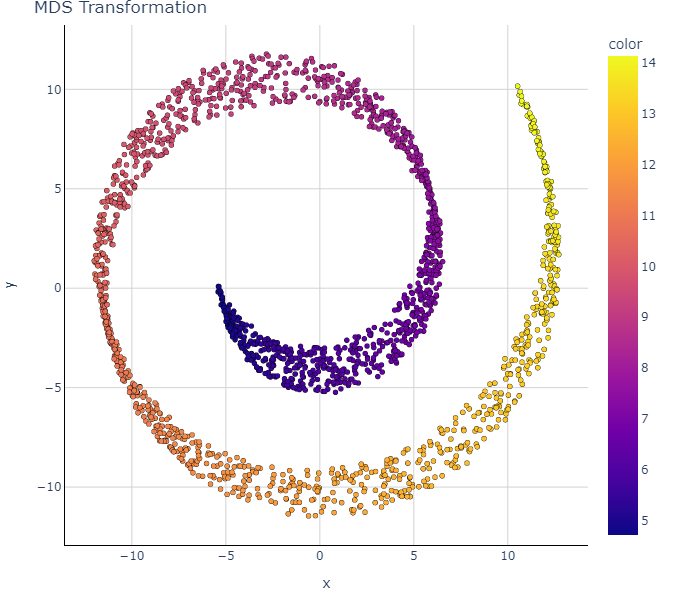

In [46]:
# scatter plot using plotly

## init scatter plot
fig = px.scatter(x = X_pca[:, 0], y = X_pca[:, 1], opacity = 1, color = y)

## bg color
fig.update_layout(dict(plot_bgcolor = 'white'))

## axes and grids
fig.update_xaxes(showgrid = True, gridwidth = 1, gridcolor = 'lightgrey',
                 zeroline = True, zerolinewidth = 1, zerolinecolor = 'lightgrey',
                 showline = True, linewidth = 1, linecolor = 'black'
                )

fig.update_yaxes(showgrid = True, gridwidth = 1, gridcolor = 'lightgrey',
                 zeroline = True, zerolinewidth = 1, zerolinecolor = 'lightgrey',
                 showline = True, linewidth = 1, linecolor = 'black'
                )

## markers
fig.update_traces(marker = dict(size = 5,
                                line = dict(color = 'black', width = 0.2)
                               ))

## size and title
fig.update_layout(
    margin=dict(l=25, r=25, t=25, b=25),
    width=700,
    height=600,
    # paper_bgcolor="LightSteelBlue",
    title_text="MDS Transformation"
)

# show fig
fig.show();

- As we can see, not all spread of the data is properly captured.

# 4. t-distributed Stochastic Neighbor Embedding (t-SNE)

- We will use the iris dataset for t-SNE.

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target 

X.shape

(150, 4)

In [11]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2,
            perplexity = 30,
            n_iter = 1000,
            n_iter_without_progress = 300,
            verbose = 1,
            random_state = 42
           )

X_tsne = model.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.298508
[t-SNE] KL divergence after 1000 iterations: 0.121510


In [12]:
print('The new shape of X:',X_tsne.shape)
print('No. of Iterations:', model.n_iter_)
print('Stress:', model.kl_divergence_)

The new shape of X: (150, 2)
No. of Iterations: 999
Stress: 0.1215100884437561


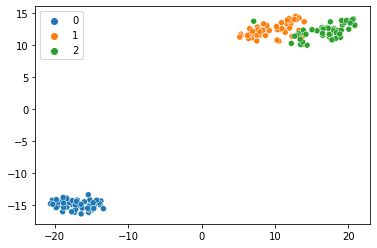

In [19]:
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue = y, palette = 'tab10');

- t-SNE does a good job of classifying the three classes.